In [1]:
from custom_trading_env import Actions,Positions,TradingEnv
from DQN_model import QNetwork
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

In [2]:
df = pd.read_csv("./data/TestData.csv")
# Feature Engineering
df['prev_high'] = df['high'].shift(1)
df['prev_close'] = df['close'].shift(1)
df['prev_low'] = df['low'].shift(1)
df['SMA_5'] = df['close'].rolling(window=5).mean().shift(1)
df['EMA_5'] = df['close'].ewm(span=5, adjust=False).mean().shift(1)

Total rewards : 0
Total trades made: 89
Successful trades: 0
Success rate: 0.00%
Profit: 1.0


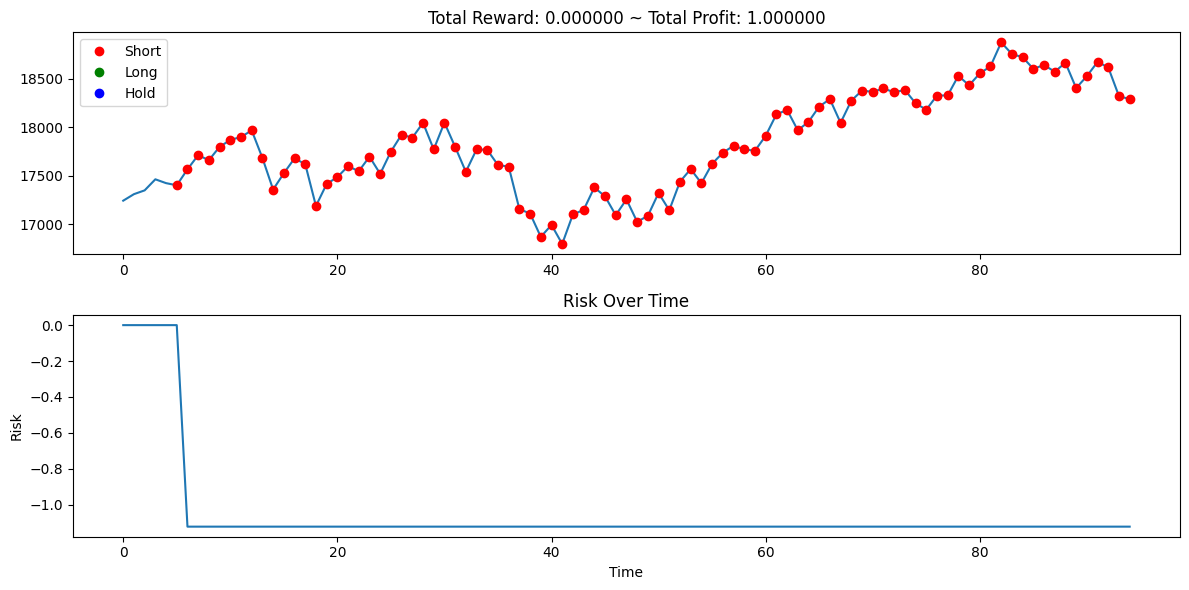

In [3]:
# Enter the name of the model you want to use
q_network = torch.load('./saved_models/model_3_300_days')
q_network.eval()

# In frame_bound enter a tuple of the form (start_day,end_day) and start_day>window_size
env = TradingEnv(df,window_size=5,frame_bound=(10,100))  
env.reset()

# Initialize some variables to keep track of performance
total_rewards = 0
total_trades = 0
successful_trades = 0
episode_profits = []
# Number of episodes for testing
num_test_episodes = 100


state = env.reset()
state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Adding batch dimension
episode_rewards = 0

for step in range(1000):
    with torch.no_grad():
        action = torch.argmax(q_network(state)).item()

    next_state, reward, done, info = env.step(action)
    next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)  # Adding batch dimension
    
    episode_rewards += reward
    episode_profit = env._total_profit
    episode_profits.append(episode_profit)

    # Optional: You can keep track of successful trades
    if reward > 0:
        successful_trades += 1

    total_trades += 1

    if done:
        break
    
    state = next_state

    


print(f"Total rewards : {episode_rewards}")
print(f"Total trades made: {total_trades}")
print(f"Successful trades: {successful_trades}")
print(f"Success rate: {successful_trades/total_trades * 100:.2f}%")
average_profit = sum(episode_profits) / len(episode_profits)
print(f"Profit: {average_profit}")
env.render_all()